In [10]:
from googleapiclient import  discovery
from oauth2client.client  import GoogleCredentials
import sys
import io
import base64
from PIL import Image
from PIL import ImageDraw
from genericpath import isfile
import os
import hashlib
from oauth2client.service_account import ServiceAccountCredentials
import imageio
import numpy as np
import matplotlib.pyplot as plt

## Detecting Face

In [11]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]='/Users/jungyeonkoh/Downloads/My First Project-500b6dfc89fb.json'

def detect_faces(path):
    """Detects faces in an image."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.types.Image(content=content)

    response = client.face_detection(image=image)
    faces = response.face_annotations
    
    
    # Names of likelihood from google.cloud.vision.enums
    likelihood_name = ('UNKNOWN', 'VERY_UNLIKELY', 'UNLIKELY', 'POSSIBLE',
                       'LIKELY', 'VERY_LIKELY')
    # print('Faces:')
    """
    for face in faces:
        # print('anger: {}'.format(likelihood_name[face.anger_likelihood]))
        # print('joy: {}'.format(likelihood_name[face.joy_likelihood]))
        # print('surprise: {}'.format(likelihood_name[face.surprise_likelihood]))

        vertices = ([(vertex.x, vertex.y)
                    for vertex in face.bounding_poly.vertices])

        # print('face bounds: {}'.format(','.join(vertices)))
    """
    vertices = ([(vertex.x, vertex.y) for vertex in faces[0].bounding_poly.vertices])
    
    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

    return vertices

## How Google Vision API works  


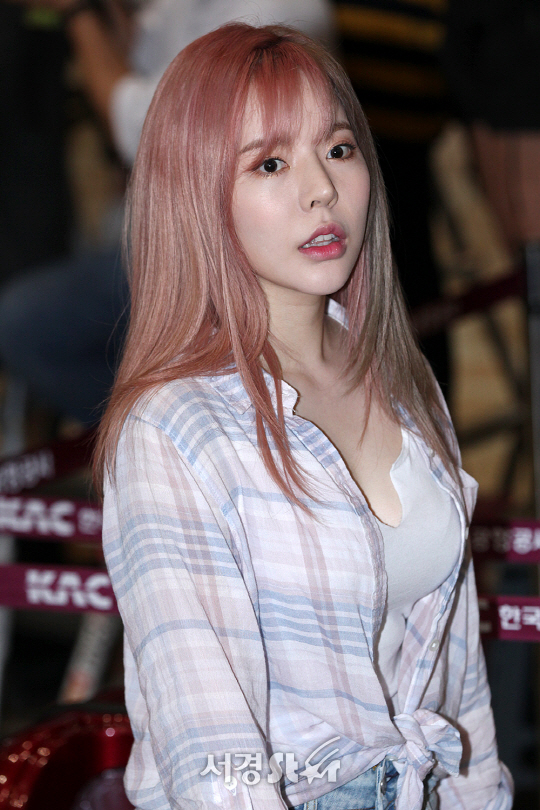

In [13]:
file_path = "/Users/jungyeonkoh/Desktop/YAI/Crawling_Images/써니/2.jpg"
Image.open(io.open(file_path, "rb"))

[(172, 25), (423, 25), (423, 317), (172, 317)]


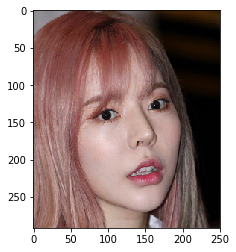

In [15]:
print(detect_faces(file_path))
img = imageio.imread(file_path)
plt.imshow(img[25:317, 172:423, :])

### Crop Faces  

In [16]:
def crop_face(path, label):
    for i, image in enumerate(os.listdir(path+label)):
        try:
            face = detect_faces(path+label+'/'+image)
            img = imageio.imread(path+label+'/'+image)
            cropped = img[face[0][1]:face[2][1], face[0][0]:face[1][0],:]

            ### make folder and save picture in that directory
            saveDir = path+label+"_cropped"
            try:
                if not(os.path.isdir(saveDir)):
                    os.makedirs(os.path.join(saveDir))
            except OSError as e:
                if e.errno != errno.EEXIST:
                    print("Failed to create directory!!!!!")
                    raise

            ### save
            im = Image.fromarray(cropped)
            im.save(saveDir+'/'+str(i+306)+'.jpg')
            if i%100 == 0:
                print(str(i)+'/'+str(len(os.listdir(path+label)))+' images cropped')
        except:
            print(str(i)+'th image '+path+label+'/'+image+' passed~')
            pass

    print('Total '+str(len(os.listdir(path+label)))+' images cropped')

In [21]:
# crop할 이미지들이 들어있는 폴더
path = "/Users/jungyeonkoh/Desktop/YAI/Crawling_Images/"
label= "써니"

crop_face(path, label)

0/89 images cropped
13th image /Users/jungyeonkoh/Desktop/YAI/Crawling_Images/써니/65.jpg passed~
14th image /Users/jungyeonkoh/Desktop/YAI/Crawling_Images/써니/.DS_Store passed~
Total 89 images cropped
